In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [8]:
gold_data = pd.read_csv('gld_price_data.csv')

In [9]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
gold_data.shape

(2290, 6)

In [12]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
correlation = gold_data.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12704\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


# constructing a heatmap to understand the correlatiom

<Axes: >

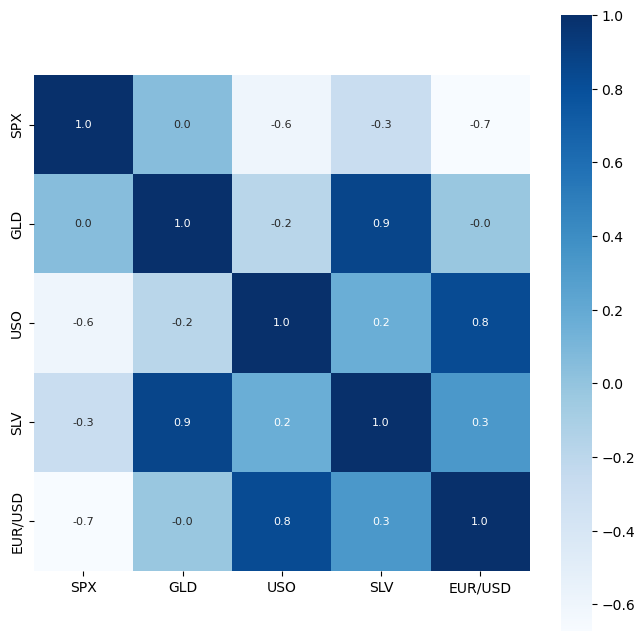

In [15]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# checking the distribution of the GLD Price

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12704\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

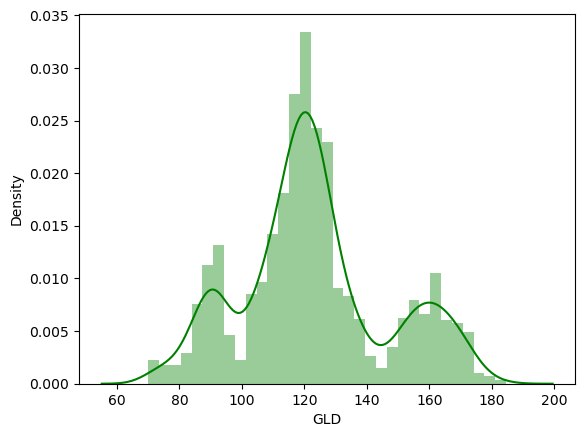

In [17]:
sns.distplot(gold_data['GLD'],color='green')

In [18]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test Data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# prediction on Test Data

In [23]:
test_data_prediction = regressor.predict(X_test)

In [24]:
print(test_data_prediction)

[168.60329956  82.1106997  115.95050022 127.56310083 120.89330136
 154.88099792 150.13509796 126.1251001  117.51519868 126.06460068
 116.70250128 171.56800064 141.71499882 167.61919845 115.28870003
 117.80770074 140.25370317 169.97440085 159.41500311 160.90170002
 155.15880028 125.30460033 175.98009915 156.93170321 125.25700046
  93.75859962  78.01179986 120.51900004 119.16429939 167.51929903
  87.89710075 125.28489989  91.31430112 117.56520051 121.20689935
 136.53250054 115.35600131 114.89370052 147.4133993  107.07090117
 104.61140244  87.19719781 126.58300047 117.5833     153.45389891
 119.73229976 108.33309974 107.9912981   93.25840064 127.07509784
  75.09210013 113.64009968 121.57740003 111.30489919 118.84839894
 120.71699937 158.14060066 168.24510118 146.89429637  85.86099886
  94.4475005   86.8398988   90.56259981 118.5572008  126.50330031
 127.58630008 167.99799954 122.19539974 117.52069882  98.39620061
 168.67580082 143.1848995  132.09830229 121.26250224 120.68699947
 119.75880

# R squared error

In [25]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898484151240663


# Compare the Actual Values and Predicted Values in a Plot

In [26]:
Y_test = list(Y_test)

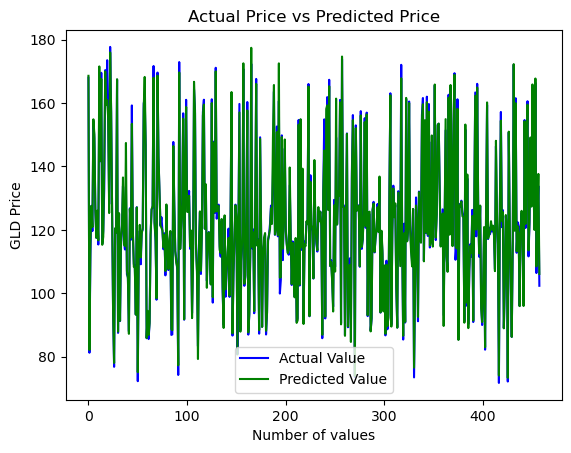

In [27]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()